In [19]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
file = open('cv_df_extracted', 'rb')
cv_df = pickle.load(file)

In [21]:
cv_df['CLNSIG'].value_counts()

Benign_cat                    28086
Uncertain_significance_cat    17223
Pathogenic_cat                12354
Name: CLNSIG, dtype: int64

In [22]:
cv_df.head()

,CHROM,POS,ID,REF,ALT,AF_EXAC,CLNDN,CLNSIG,CLNVC,MC,...,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
5,1,1168180,281204,G,C,0.10020,not_specified,Benign_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,174,E/D,gaG/gaC,,tolerated,benign,,1.053,-0.208682,2
12,1,1470752,161192,G,A,NaN,Spinocerebellar_ataxia_21|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,170,P/L,cCg/cTg,OK,deleterious_low_confidence,benign,,31,6.517838,-3
28,1,2160305,37261,G,A,NaN,Shprintzen-Goldberg_syndrome|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,34,G/S,Ggc/Agc,,,,,22.5,3.114491,
29,1,2160305,37262,G,T,NaN,Shprintzen-Goldberg_syndrome,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,34,G/C,Ggc/Tgc,,,,,24.7,4.766224,-3
35,1,2160554,224868,G,C,NaN,Shprintzen-Goldberg_syndrome|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,117,G/R,Ggc/Cgc,,,,,23.7,4.079099,-2


In [33]:
# convert BLOSUM62 and CADD_PHRED columns to floats and ints
# also fill in empty strings '' as zeros for conversion
cv_df.dtypes
cv_df.loc[cv_df['BLOSUM62'] == '', ['BLOSUM62']] = '0'
cv_df.loc[cv_df['CADD_PHRED'] == '', ['CADD_PHRED']] = '0'
cv_df = cv_df.astype({'CADD_PHRED': 'float', 'BLOSUM62': 'int64'})
cv_df.head()

,CHROM,POS,ID,REF,ALT,AF_EXAC,CLNDN,CLNSIG,CLNVC,MC,...,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
5,1,1168180,281204,G,C,0.10020,not_specified,Benign_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,174,E/D,gaG/gaC,,tolerated,benign,,1.053,-0.208682,2
12,1,1470752,161192,G,A,NaN,Spinocerebellar_ataxia_21|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,170,P/L,cCg/cTg,OK,deleterious_low_confidence,benign,,31.000,6.517838,-3
28,1,2160305,37261,G,A,NaN,Shprintzen-Goldberg_syndrome|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,34,G/S,Ggc/Agc,,,,,22.500,3.114491,0
29,1,2160305,37262,G,T,NaN,Shprintzen-Goldberg_syndrome,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,34,G/C,Ggc/Tgc,,,,,24.700,4.766224,-3
35,1,2160554,224868,G,C,NaN,Shprintzen-Goldberg_syndrome|not_provided,Pathogenic_cat,single_nucleotide_variant,SO:0001583|missense_variant,...,117,G/R,Ggc/Cgc,,,,,23.700,4.079099,-2


## Testing and Modeling below

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

X = cv_df[['CADD_PHRED','BLOSUM62']]
y = cv_df['CLNSIG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# KNN algorithm
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7351946588051678

In [38]:
# Logistic Regression
model2 = LogisticRegressionCV()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.6610595681956126

In [39]:
# Random Forest
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.731726350472557

In [40]:
# XGBoost
model4 = xgb.XGBRFClassifier()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.7621607560912165

In [12]:
from sklearn.metrics import confusion_matrix
#Generate predictions with the model using our X values
y_pred = model.predict(X_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#Swap rows 2,3 and columns 2,3, for better understanding
cf_matrix[[1,2]] = cf_matrix[[2,1]]
cf_matrix[:, [1, 2]] = cf_matrix[:, [2, 1]]
cf_df = pd.DataFrame(cf_matrix)

In [13]:
cf_df
cf_df.rename(columns={0: "Benign", 1: "Uncertain", 2: "Pathogenic"}, inplace=True)
cf_df.rename(index={0: "Benign", 1: "Uncertain", 2: "Pathogenic"})

,Benign,Uncertain,Pathogenic
Benign,4632,857,151
Uncertain,931,1970,510
Pathogenic,128,477,1877


In [14]:
y_test.value_counts()

Benign_cat                    5640
Uncertain_significance_cat    3411
Pathogenic_cat                2482
Name: CLNSIG, dtype: int64

Text(33.0, 0.5, 'Actual')

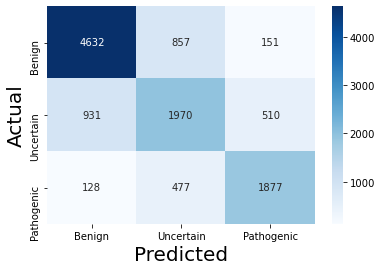

In [15]:
import seaborn as sns
columns = ['Benign','Uncertain','Pathogenic']
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels = columns, yticklabels = columns)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)


In [ ]:
# ROC curve cannot be drawn for multiclass
# from sklearn.metrics import roc_auc_score
# roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

Text(33.0, 0.5, 'Actual')

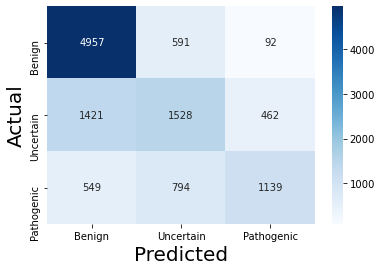

In [37]:
# do the same for the logistic regression
y_pred = model2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix[[1,2]] = cf_matrix[[2,1]]
cf_matrix[:, [1, 2]] = cf_matrix[:, [2, 1]]
cf_df = pd.DataFrame(cf_matrix)

cf_df.rename(columns={0: "Benign", 1: "Uncertain", 2: "Pathogenic"}, inplace=True)
cf_df.rename(index={0: "Benign", 1: "Uncertain", 2: "Pathogenic"})

columns = ['Benign','Uncertain','Pathogenic']
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels = columns, yticklabels = columns)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)

In [ ]:
# do the same for the random forest
y_pred = model2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix[[1,2]] = cf_matrix[[2,1]]
cf_matrix[:, [1, 2]] = cf_matrix[:, [2, 1]]
cf_df = pd.DataFrame(cf_matrix)

cf_df.rename(columns={0: "Benign", 1: "Uncertain", 2: "Pathogenic"}, inplace=True)
cf_df.rename(index={0: "Benign", 1: "Uncertain", 2: "Pathogenic"})

columns = ['Benign','Uncertain','Pathogenic']
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels = columns, yticklabels = columns)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)